In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")

2025-03-23 22:50:37.932594: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-23 22:50:37.932720: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-23 22:50:38.065043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

In [3]:
def test_df(ts_path):
    classes = []
    class_paths = []
    files = os.listdir(ts_path)
    for file in files:
        label_dir = os.path.join(ts_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    ts_df = pd.concat([image_paths, image_classes], axis=1)
    return ts_df

In [4]:
tr_df = train_df('/kaggle/input/coffee-bean-dataset-resized-224-x-224/train')

In [5]:
tr_df

,Class Path,Class
0,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
1,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
2,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
3,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
4,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
...,...,...
1195,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1196,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1197,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
1198,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium


In [6]:
ts_df = test_df('/kaggle/input/coffee-bean-dataset-resized-224-x-224/test')

In [7]:
ts_df

,Class Path,Class
0,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
1,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
2,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
3,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
4,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
...,...,...
395,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
396,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
397,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
398,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium


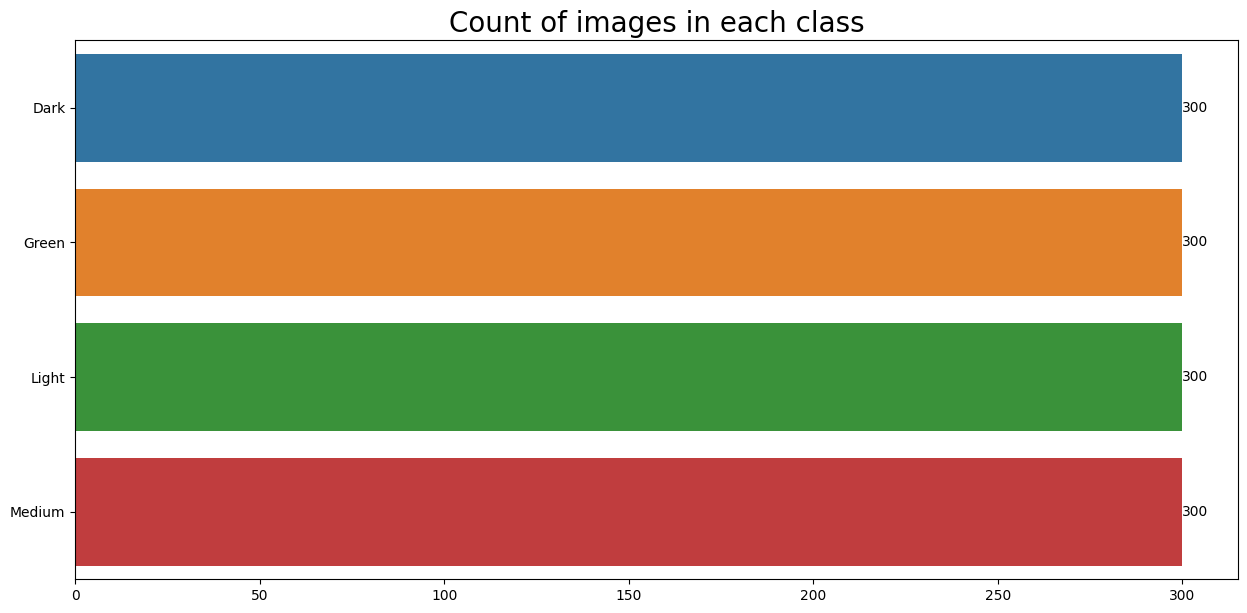

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

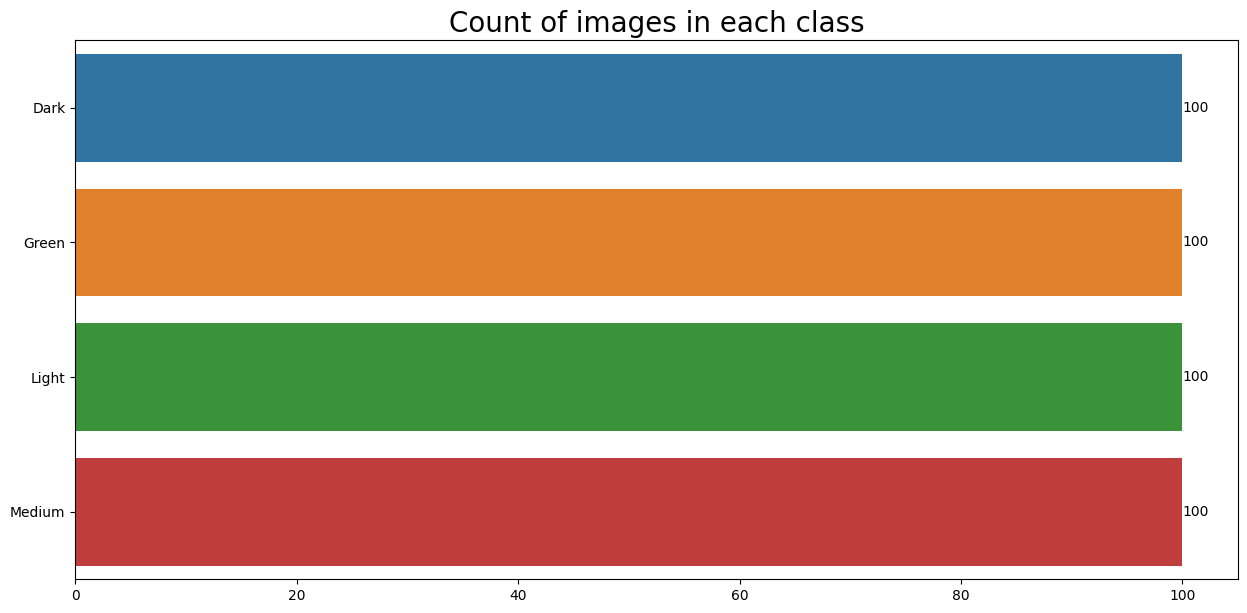

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df , y=ts_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
valid_df, ts_df = train_test_split(ts_df, train_size=.4, random_state=32)
#valid_df= ts_df

In [11]:
valid_df

,Class Path,Class
263,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
93,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
274,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
16,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark
128,/kaggle/input/coffee-bean-dataset-resized-224-...,Green
...,...,...
380,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
310,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
389,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
43,/kaggle/input/coffee-bean-dataset-resized-224-...,Dark


In [12]:
ts_df

,Class Path,Class
223,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
145,/kaggle/input/coffee-bean-dataset-resized-224-...,Green
146,/kaggle/input/coffee-bean-dataset-resized-224-...,Green
366,/kaggle/input/coffee-bean-dataset-resized-224-...,Medium
268,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
...,...,...
224,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
293,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
284,/kaggle/input/coffee-bean-dataset-resized-224-...,Light
213,/kaggle/input/coffee-bean-dataset-resized-224-...,Light


In [13]:
batch_size = 16
img_size = (224,224)

tr_gen = ImageDataGenerator(brightness_range=(.8,1.2))

gen = ImageDataGenerator()


tr_gen = tr_gen.flow_from_dataframe(tr_df, x_col='Class Path',
                                 y_col='Class',batch_size=batch_size,
                                 target_size=img_size)

valid_gen = gen.flow_from_dataframe(valid_df, x_col='Class Path',
                                    y_col='Class',batch_size=batch_size,
                                    target_size=img_size)

ts_gen = gen.flow_from_dataframe(ts_df, x_col='Class Path',
                                y_col='Class',batch_size=batch_size,
                                 target_size=img_size,shuffle=False)

Found 1200 validated image filenames belonging to 4 classes.
Found 160 validated image filenames belonging to 4 classes.
Found 240 validated image filenames belonging to 4 classes.


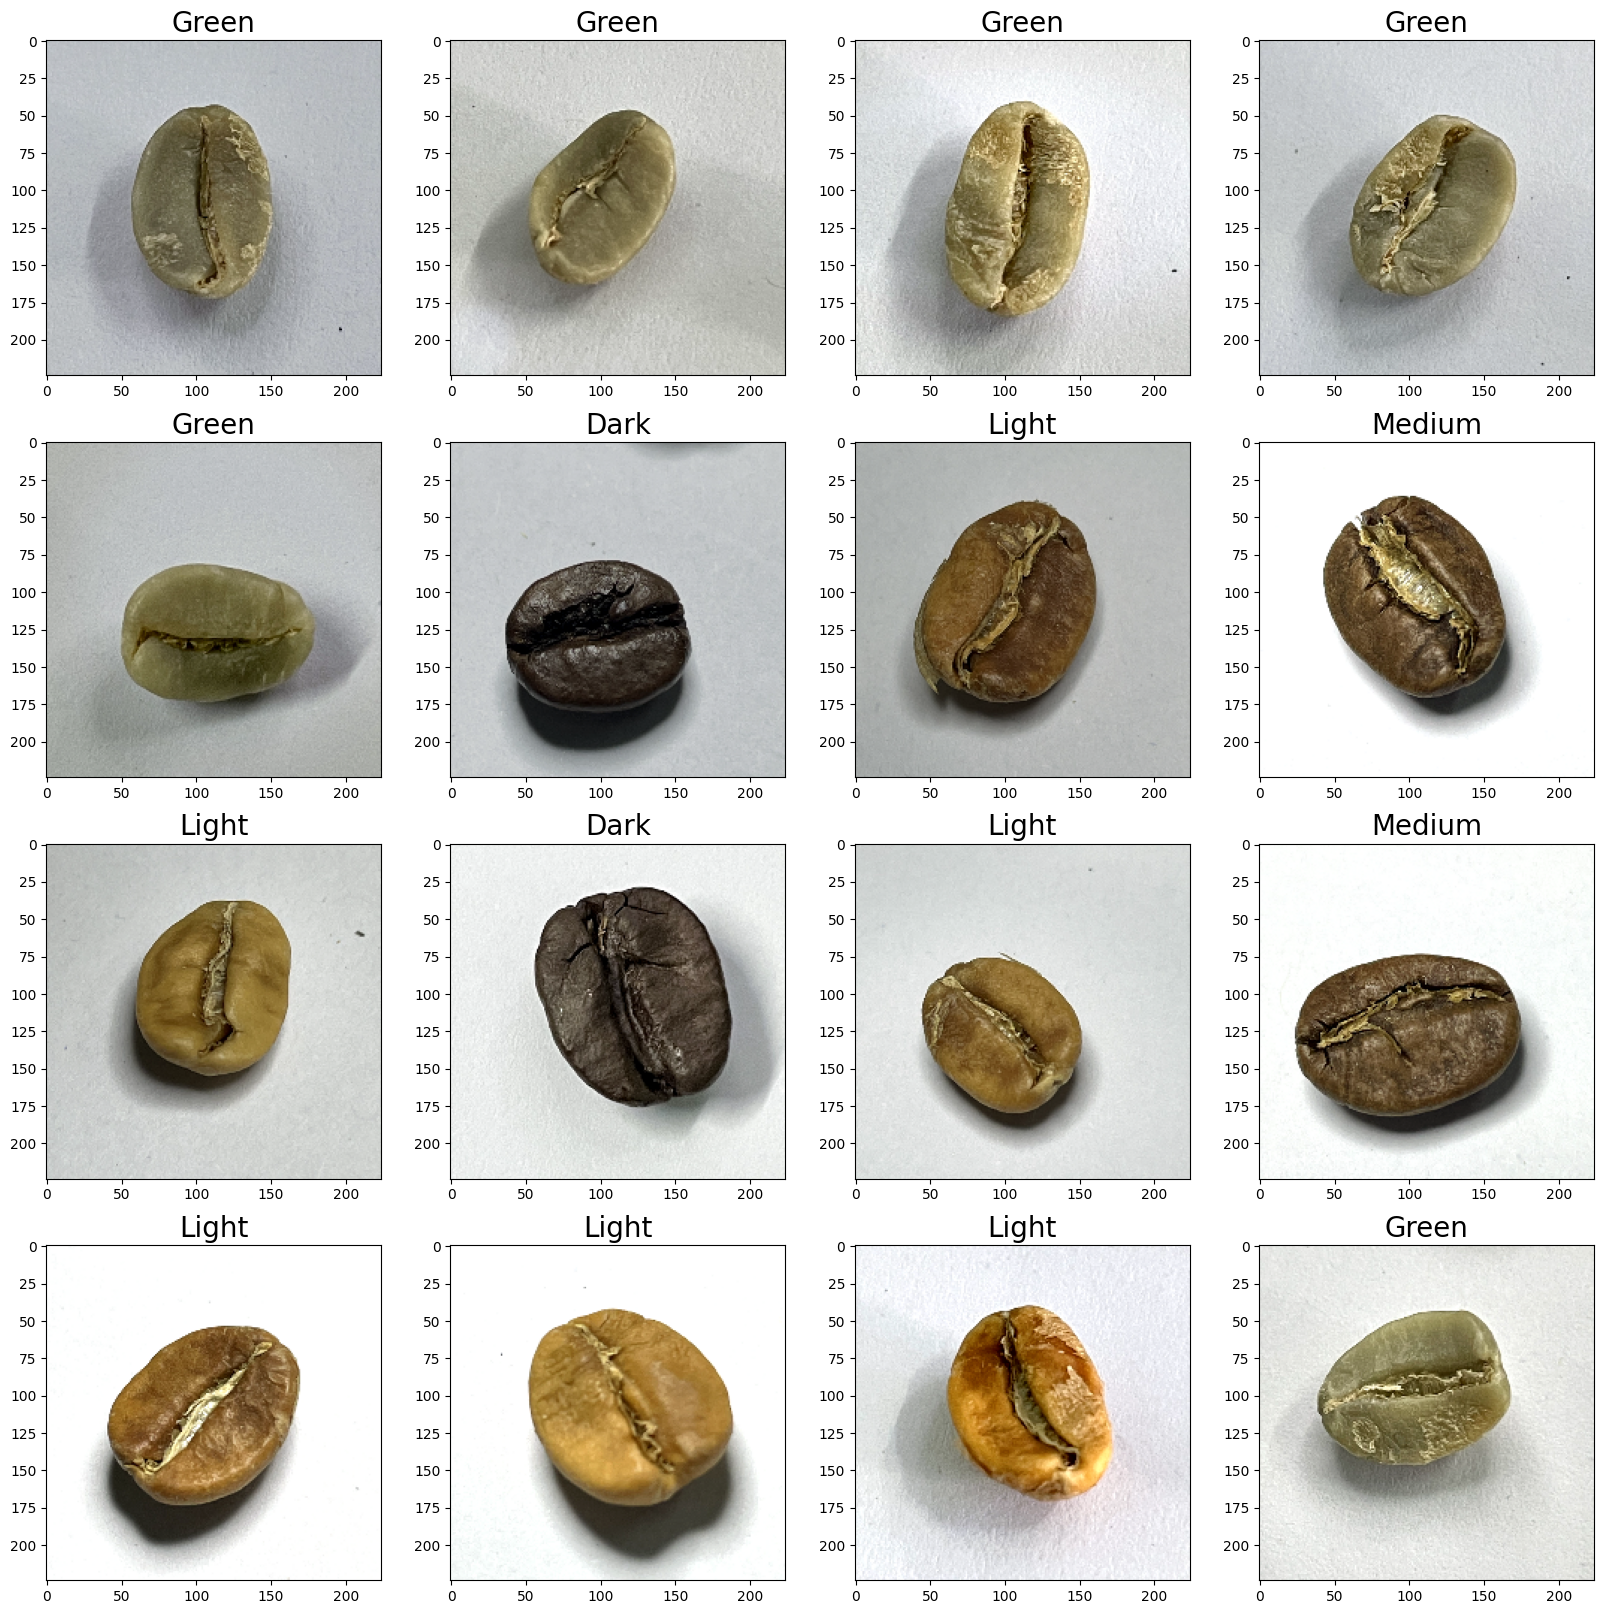

In [14]:
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
images, labels = next(tr_gen)

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4,4,i+1)
    image = images[i] / 255
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='k', fontsize=20)
plt.show()

In [15]:
num_classes = len(classes)
num_classes

4

In [16]:
img_shape=(224,224,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')
    
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(rate=0.25),
    Dense(num_classes, activation='softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

83683744/83683744 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 batch_normalization_4 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0 

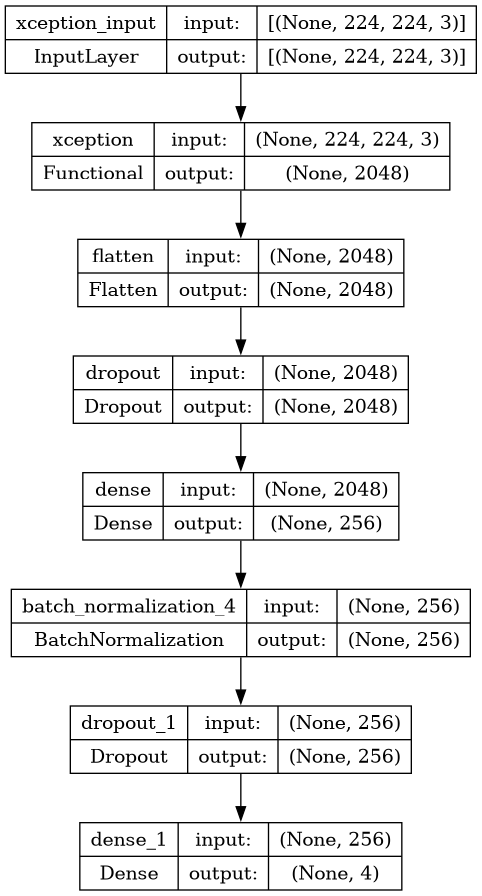

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=3)
hist = model.fit(tr_gen,
                 epochs=20,
                 validation_data=valid_gen,
                 shuffle= False,
                 callbacks=es)

Epoch 1/20


I0000 00:00:1742770273.715144      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 [==============================] - 37s 168ms/step - loss: 0.3718 - accuracy: 0.8867 - val_loss: 0.2157 - val_accuracy: 0.9000
Epoch 2/20
75/75 [==============================] - 11s 151ms/step - loss: 0.1600 - accuracy: 0.9500 - val_loss: 0.0930 - val_accuracy: 0.9500
Epoch 3/20
75/75 [==============================] - 11s 149ms/step - loss: 0.0870 - accuracy: 0.9758 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/20
75/75 [==============================] - 11s 149ms/step - loss: 0.0521 - accuracy: 0.9867 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/20
75/75 [==============================] - 11s 150ms/step - loss: 0.0517 - accuracy: 0.9833 - val_loss: 3.2384e-04 - val_accuracy: 1.0000
Epoch 6/20
75/75 [==============================] - 11s 150ms/step - loss: 0.0378 - accuracy: 0.9875 - val_loss: 2.6112e-04 - val_accuracy: 1.0000
Epoch 7/20
75/75 [==============================] - 11s 149ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 4.7056e-04 - val_accuracy: 1.000

In [19]:
model.evaluate(ts_gen, verbose=1)

15/15 [==============================] - 1s 95ms/step - loss: 0.0011 - accuracy: 1.0000


[0.0010792911052703857, 1.0]

In [20]:
model.save("coffee_Model.h5")

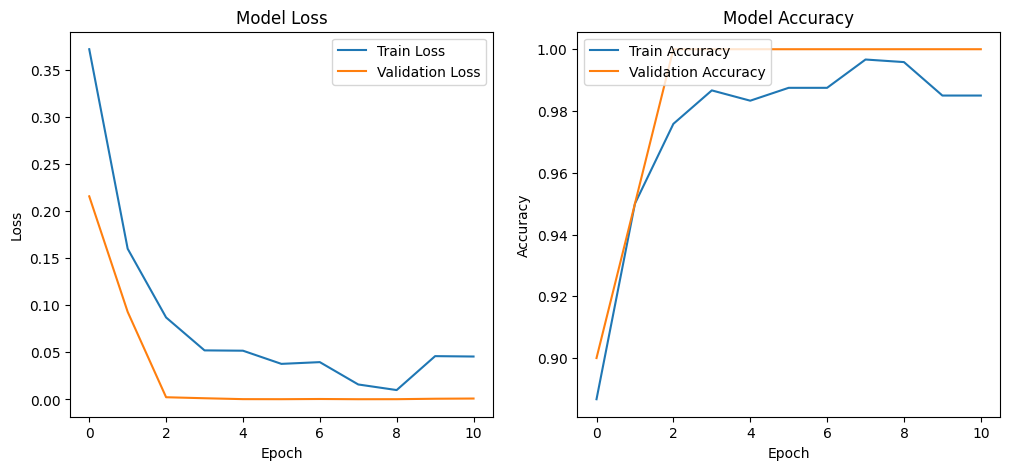

In [21]:
# Crear una figura para contener los subgráficos
plt.figure(figsize=(12, 5))

# Subgráfico para la pérdida
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Subgráfico para la precisión
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

In [22]:
pred = model.predict(ts_gen)
pred = np.argmax(pred, axis=1)

labels = (tr_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

15/15 [==============================] - 1s 47ms/step


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = ts_df['Class']
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

        Dark       1.00      1.00      1.00        54
       Green       1.00      1.00      1.00        59
       Light       1.00      1.00      1.00        58
      Medium       1.00      1.00      1.00        69

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240

Accuracy of the Model: 100.0%


In [24]:
classes=list(tr_gen.class_indices.keys())
print (classes)

['Dark', 'Green', 'Light', 'Medium']


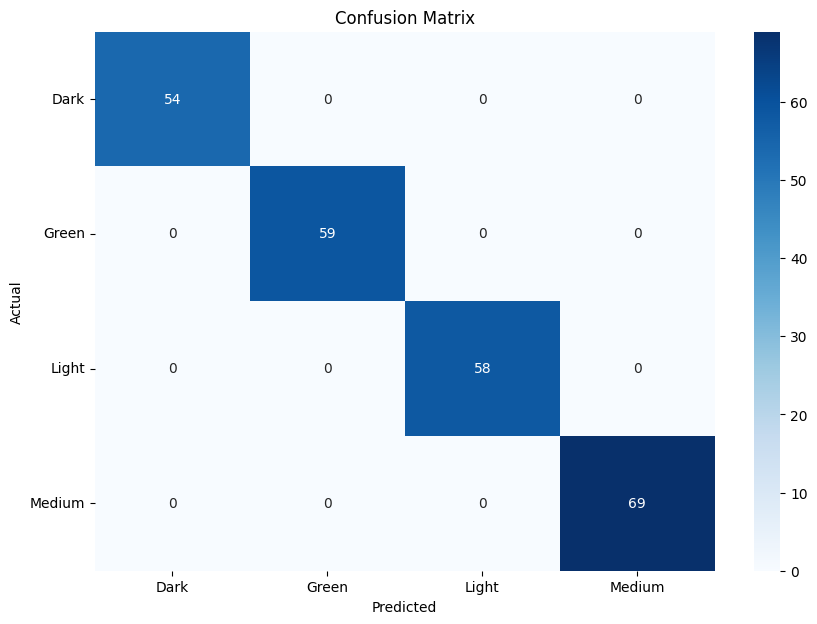

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_true = ts_df['Class'].values  # Replace 'Class' with the actual column name containing the true labels
cm = confusion_matrix(y_true, pred2)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

num_classes = len(classes)

plt.xticks(ticks=[i + 0.5 for i in range(num_classes)], labels=classes, rotation=0)
plt.yticks(ticks=[i + 0.5 for i in range(num_classes)], labels=classes, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()